In [254]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline  
pd.set_option('max_colwidth', 1000)

# 1.0

# Бейзлайн без нормализации

In [255]:
train_data = pd.read_csv('sentiment_twitter/train_sentiment_ttk.tsv', sep='\t')
test_data = pd.read_csv('sentiment_twitter/test_sentiment_ttk.tsv', sep='\t')

Распределение по классам:

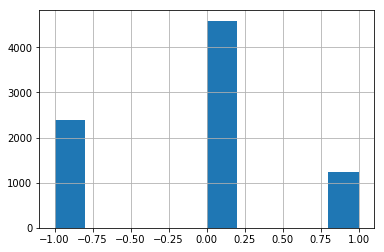

In [256]:
train_data.label.hist()

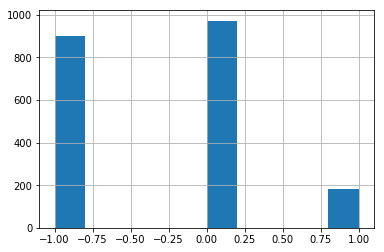

In [257]:
test_data.label.hist()

In [401]:
compare = {}

# CountVectorizer

In [402]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(train_data.text.values) 

X_train = count_vectorizer.transform(train_data.text.values)
X_test = count_vectorizer.transform(test_data.text.values)

In [403]:
y_train = train_data.label.values
y_test = test_data.label.values

In [404]:
clf = LogisticRegression(penalty="l1", C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [405]:
y_pred = clf.predict(X_test)

Качество классификатора:

In [406]:
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.69      0.59      0.64       902
          0       0.61      0.80      0.69       972
          1       0.30      0.03      0.06       180

avg / total       0.62      0.64      0.61      2054

Макросредняя F1 мера -  0.46306421211286786
Микросредняя F1 мера -  0.6387536514118792


In [414]:
compare['CountVectorizer'] = [round(f1_score(y_test, y_pred, average='macro'),4), round(f1_score(y_test, y_pred, average='micro'),4)]

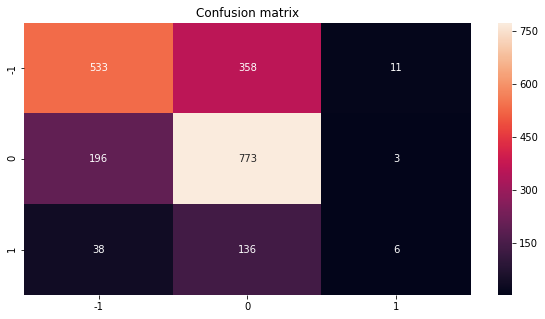

In [415]:
labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

In [416]:
def print_important(vectorizer, clf, topn=10):
    features = vectorizer.get_feature_names()
    classes = clf.classes_
    importances = clf.coef_
    for i, cls in enumerate(classes):
        print('Значимые слова для класса - ', cls)
        important_words = sorted(list(zip(features, importances[i])), key=lambda x: abs(x[1]), reverse=True)[:topn]
        print([word for word,_ in important_words])
        print()

In [417]:
print_important(count_vectorizer, clf)

Значимые слова для класса -  -1
['сбой', 'tele2', 'старые', 'нет', 'проблемы', 'тарифов', 'сука', 'просит', 'отключили', 'крыму']

Значимые слова для класса -  0
['пожалуйста', 'гонконгские', 'связь', 'просит', 'цены', '20', 'иа', 'здравствуйте', 'скачать', 'для']

Значимые слова для класса -  1
['узбекистан', 'спасибо', 'клиенты', 'люблю', 'запустил', 'области', 'пожалуйста', '4g', 'увеличил', 'теперь']



In [418]:
from wordcloud import WordCloud

(-0.5, 999.5, 499.5, -0.5)

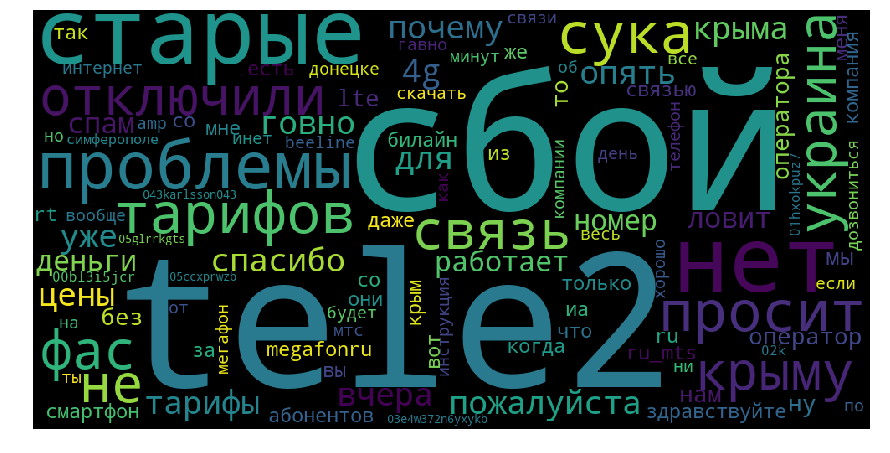

In [419]:
top = 150
features = count_vectorizer.get_feature_names()
importances = clf.coef_
classes = clf.classes_
words_with_weights = sorted(list(zip(features, importances[0])),key=lambda x: abs(x[1]), reverse=True)
only_words = [word for word,_ in words_with_weights][:top]

cloud = WordCloud(width=1000, height=500).generate(' '.join(only_words))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')

# TfidfVectorizer

In [420]:
tfidf = TfidfVectorizer()
tfidf.fit(train_data.text.values)
X_train = tfidf.transform(train_data.text.values)
X_test = tfidf.transform(test_data.text.values)

In [421]:
clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [422]:
y_pred = clf.predict(X_test)

In [423]:
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.70      0.69      0.69       902
          0       0.66      0.76      0.71       972
          1       0.37      0.09      0.15       180

avg / total       0.65      0.67      0.65      2054

Макросредняя F1 мера -  0.5175955178511717
Микросредняя F1 мера -  0.6713729308666018


In [424]:
compare['TfidfVectorizer'] = [round(f1_score(y_test, y_pred, average='macro'),4), round(f1_score(y_test, y_pred, average='micro'),4)]

In [425]:
import seaborn as sns

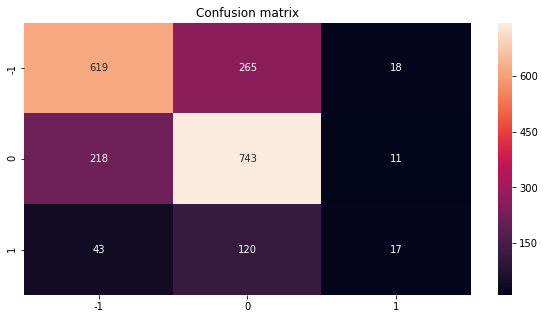

In [426]:
labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

In [427]:
print_important(tfidf, clf, 20)

Значимые слова для класса -  -1
['сбой', 'tele2', 'старые', 'не', 'сука', 'говно', 'просит', 'проблемы', 'крыму', 'фас', 'нет', 'лежит', 'опять', 'спасибо', 'тарифов', 'украина', 'http', 'для', 'донецке', 'цены']

Значимые слова для класса -  0
['иа', 'просит', 'сбой', 'гонконгские', 'цены', 'границы', 'пожалуйста', 'сн', 'связь', 'ловит', 'здравствуйте', 'инструкция', 'http', 'люблю', 'для', 'ион', 'обратилась', 'долларов', 'даже', 'номер']

Значимые слова для класса -  1
['люблю', 'узбекистан', 'спасибо', 'расходы', 'пожалуйста', 'подарок', 'клиенты', 'бесплатный', 'увеличил', 'защиты', 'не', 'мировое', 'заработал', 'запустил', 'области', 'beeline_rus', 'хорошего', 'реклама', 'водителей', 'номер']



# 1.1

# Улучшение качества классификации

In [428]:
import re

In [429]:
train_data.head()

,label,text,normalized,stemming
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн","максим , ваш письмо мы получить . наш сотрудник связаться с вы завтра и направить запрос инженер для проверка . #билайн","макс , ваш письм мы получ . наш сотрудник свяжут с вам завтр и направ запрос инженер для проверк . #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»,« мегафон » стать владелец 50 % акция « евросеть »,« мегафон » стал владельц 50 % акц « евросет »
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …","rt “ мтс россия прислать житель херсонщина сообщение , в который обозвать украинец фашист ? …","RT “ мтс росс присла жител херсонщин сообщен , в котор обозва украинц фашист ? …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0,видео : реклама с смех мтс - супер 0,виде : реклам со смех мтс - супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!","потому что мтс достать , а пчела ненавидеть с детство , как и они мёд !","пот что мтс доста , а пчел ненавиж с детств , как и их мед !"


Наша задача: избавиться от разных ссылок, включая ники людей, так как они не дают никакой информации о тональности текста.

Удаляем адреса:

In [430]:
def remove_sites(text):
    no_sites_text = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', ' ', text, flags=re.MULTILINE)
    no_space_sequences_text = re.sub('  +', ' ', no_sites_text)
    return no_space_sequences_text

Упоминания о людях:

In [431]:
def remove_people(text):
    no_people_text = re.sub('@.+? ', ' ', text, flags=re.MULTILINE)
    no_space_sequences_text = re.sub('  +', ' ', no_people_text)
    return no_people_text

Пользуюсь специальным токенайзером для твиттера, так как он учитывает "разговорный" язык твитов (в том числе считает смайлики, не разделяет слова с апострофами).

In [432]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
stops = stopwords.words('russian')

Убираем стоп-слова (служебные части речи ничего в редких случая могут сказать о тональности текста):

In [433]:
def normalize_stop(text):
    text = remove_sites(text)
    text = remove_people(text) 
    lemmas = [morph.parse(token)[0].normal_form for token in tknzr.tokenize(text)]
    return ' '.join(lemmas) 

In [434]:
def clean(text):
    text = remove_sites(text)
    text = remove_people(text)
    text = normalize_stop(text)
    return text

Использую pymorphy, так как при незнакомых словах он предугадывает их начальную форму, mystem в этом случае проигрывает.

In [435]:
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
morph = MorphAnalyzer()

In [436]:
train_data['normalized'] = train_data['text'].apply(clean)

In [437]:
train_data.head()

,label,text,normalized,stemming
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн","максим , ваш письмо мы получить . наш сотрудник связаться с вы завтра и направить запрос инженер для проверка . #билайн","макс , ваш письм мы получ . наш сотрудник свяжут с вам завтр и направ запрос инженер для проверк . #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»,« мегафон » стать владелец 50 % акция « евросеть »,« мегафон » стал владельц 50 % акц « евросет »
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …","rt “ мтс россия прислать житель херсонщина сообщение , в который обозвать украинец фашист ? …","RT “ мтс росс присла жител херсонщин сообщен , в котор обозва украинц фашист ? …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0,видео : реклама с смех мтс - супер 0,виде : реклам со смех мтс - супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!","потому что мтс достать , а пчела ненавидеть с детство , как и они мёд !","пот что мтс доста , а пчел ненавиж с детств , как и их мед !"


In [438]:
test_data['normalized'] = test_data['text'].apply(clean)

In [439]:
tfidf = TfidfVectorizer(stop_words=stops)
tfidf.fit(train_data['normalized'].values)

X_train = tfidf.transform(train_data['normalized'].values)
X_test = tfidf.transform(test_data['normalized'].values)

In [440]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [441]:
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.76      0.56      0.64       902
          0       0.62      0.86      0.72       972
          1       0.49      0.12      0.19       180

avg / total       0.67      0.66      0.64      2054

Макросредняя F1 мера -  0.51797162790908
Микросредняя F1 мера -  0.6635832521908471


In [442]:
compare['TfidfVectorizer c нормализацией (лемматизация)'] = [round(f1_score(y_test, y_pred, average='macro'),4), round(f1_score(y_test, y_pred, average='micro'),4)]

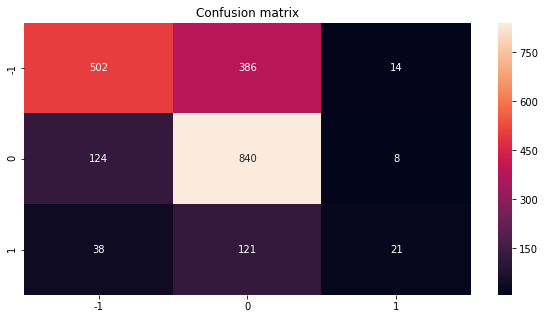

In [443]:
labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

Макросредняя F1 мера увеличилась. Микросредняя F1 мера уменьшилась.

# 2.1

# Выбор важных признаков

l1 зануляет ненужные признаки и увеличивает значения важных

In [444]:
tfidf = TfidfVectorizer(stop_words=stops)
tfidf.fit(train_data['normalized'].values)

X_train = tfidf.transform(train_data['normalized'].values)
X_test = tfidf.transform(test_data['normalized'].values)

In [445]:
for every_c in [0.01, 0.1, 1, 10, 100]:
    clf = LogisticRegression(penalty="l1", C=every_c)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('При С = ' + str(every_c))
    print(classification_report(y_test, y_pred))
    print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
    print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

При С = 0.01
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       902
          0       0.47      1.00      0.64       972
          1       0.00      0.00      0.00       180

avg / total       0.22      0.47      0.30      2054

Макросредняя F1 мера -  0.2141440846001322
Микросредняя F1 мера -  0.47322297955209347
При С = 0.1
             precision    recall  f1-score   support

         -1       0.68      0.09      0.17       902
          0       0.49      0.97      0.65       972
          1       1.00      0.01      0.01       180

avg / total       0.62      0.50      0.38      2054

Макросредняя F1 мера -  0.2749520858952191
Микросредняя F1 мера -  0.49951314508276534
При С = 1
             precision    recall  f1-score   support

         -1       0.72      0.52      0.60       902
          0       0.60      0.82      0.69       972
          1       0.44      0.17      0.25       180

avg / total       0.64      0.63      0.6

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


При С = 10
             precision    recall  f1-score   support

         -1       0.72      0.61      0.66       902
          0       0.65      0.76      0.70       972
          1       0.35      0.31      0.33       180

avg / total       0.66      0.65      0.65      2054

Макросредняя F1 мера -  0.5646082216837843
Микросредняя F1 мера -  0.6548198636806232
При С = 100
             precision    recall  f1-score   support

         -1       0.69      0.58      0.63       902
          0       0.63      0.73      0.68       972
          1       0.34      0.33      0.34       180

avg / total       0.63      0.63      0.63      2054

Макросредняя F1 мера -  0.548872867753081
Микросредняя F1 мера -  0.6299902629016553


             precision    recall  f1-score   support

         -1       0.72      0.61      0.66       902
          0       0.65      0.76      0.70       972
          1       0.36      0.31      0.33       180

avg / total       0.66      0.66      0.65      2054

Макросредняя F1 мера -  0.565377557562694
Микросредняя F1 мера -  0.6553067185978578


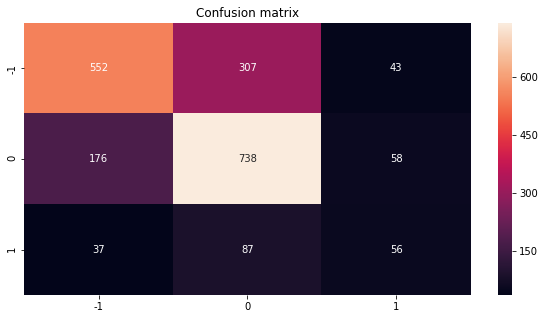

In [446]:
clf = LogisticRegression(penalty="l1", C=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

In [447]:
compare['Зануление неважных признаков'] = [round(f1_score(y_test, y_pred, average='macro'),4), round(f1_score(y_test, y_pred, average='micro'),4)]

При регуляризации при лучшем коэффиценте (10) макросредняя F1 мера увеличилась. Микросредняя F1 мера стала чуть меньше.

# Стемминг

In [448]:
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer('russian')

def normalize_stem(text):
    text = remove_sites(text)
    text = remove_people(text)
    stems = [stemmer.stem(token) for token in tknzr.tokenize(text)]
    return ' '.join(stems)

def clean_stem(text):
    text = remove_sites(text)
    text = remove_people(text)
    text = normalize_stem(text)
    return text

In [449]:
train_data['stemming'] = train_data['text'].apply(clean_stem)
test_data['stemming'] = test_data['text'].apply(clean_stem)

In [450]:
train_data.head()

,label,text,normalized,stemming
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн","максим , ваш письмо мы получить . наш сотрудник связаться с вы завтра и направить запрос инженер для проверка . #билайн","макс , ваш письм мы получ . наш сотрудник свяжут с вам завтр и направ запрос инженер для проверк . #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»,« мегафон » стать владелец 50 % акция « евросеть »,« мегафон » стал владельц 50 % акц « евросет »
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …","rt “ мтс россия прислать житель херсонщина сообщение , в который обозвать украинец фашист ? …","RT “ мтс росс присла жител херсонщин сообщен , в котор обозва украинц фашист ? …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0,видео : реклама с смех мтс - супер 0,виде : реклам со смех мтс - супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!","потому что мтс достать , а пчела ненавидеть с детство , как и они мёд !","пот что мтс доста , а пчел ненавиж с детств , как и их мед !"


             precision    recall  f1-score   support

         -1       0.74      0.63      0.68       902
          0       0.67      0.77      0.71       972
          1       0.30      0.29      0.29       180

avg / total       0.67      0.66      0.66      2054

Макросредняя F1 мера -  0.561783916893594
Микросредняя F1 мера -  0.6630963972736125


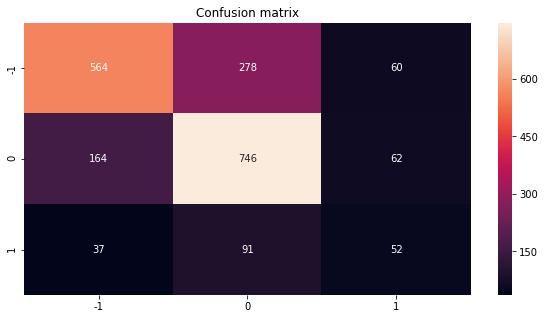

In [451]:
tfidf = TfidfVectorizer(stop_words=stops)
tfidf.fit(train_data['stemming'].values)

X_train = tfidf.transform(train_data['stemming'].values)
X_test = tfidf.transform(test_data['stemming'].values)

clf = LogisticRegression(penalty="l1", C=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

Микросредняя F1 мера немного улучшилась. Но пока это лучший вариант. Подберём параметры.

In [452]:
compare['Стемминг'] = [round(f1_score(y_test, y_pred, average='macro'),4), round(f1_score(y_test, y_pred, average='micro'),4)]

# Подбор параметры в классификаторе и векторайзере

Какие есть параметры?

TfidfVectorizer: ngram_range (учитывание n-грамм; token_pattern='\S+' (учитывает знаки препинания, смайлики: для нас это важно, так как учитывает когда много, например, знаков восклицания)

LogisticRegression: class_weight=balanced (у нас несбалансированные классы, как было раньше указано, это сбалансирует выборку)

In [465]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [466]:
X_train = train_data['stemming'].values

In [467]:
X_train.shape

(8208,)

In [468]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words=stops, token_pattern='\S+')),
    ('clf', LogisticRegression(penalty="l1", C=10, class_weight='balanced')),
])

parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

grid = GridSearchCV(pipeline, parameters, cv=3, scoring='f1_weighted')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=0)

In [469]:
X_test = test_data['stemming'].values

             precision    recall  f1-score   support

         -1       0.70      0.71      0.70       902
          0       0.72      0.69      0.70       972
          1       0.27      0.32      0.30       180

avg / total       0.67      0.66      0.67      2054

Макросредняя F1 мера -  0.567481623735922
Микросредняя F1 мера -  0.6645569620253164


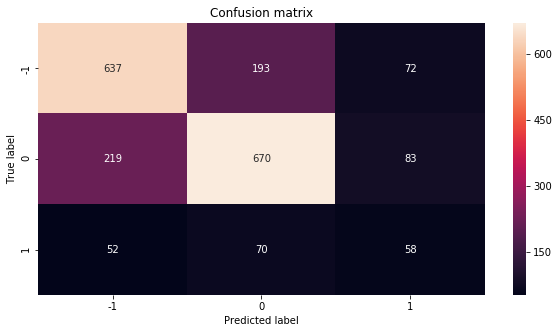

In [470]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [459]:
compare['Лучшая модель'] = [round(f1_score(y_test, y_pred, average='macro'),4), round(f1_score(y_test, y_pred, average='micro'),4)]

In [460]:
grid.best_params_

{'vect__ngram_range': (1, 1)}

Так метрики значительно улучшились, но проверим на всякий случай, как они работают на лемматизации.

             precision    recall  f1-score   support

         -1       0.73      0.64      0.68       902
          0       0.67      0.75      0.71       972
          1       0.35      0.36      0.35       180

avg / total       0.67      0.67      0.67      2054

Макросредняя F1 мера -  0.5808725480250316
Микросредняя F1 мера -  0.6660175267770204


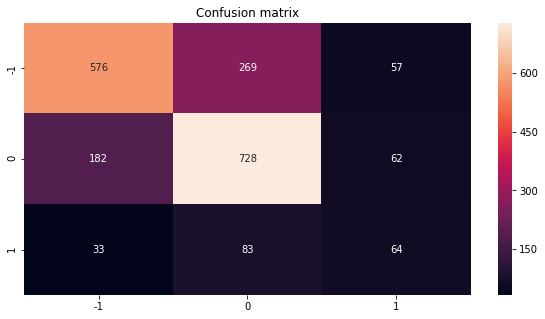

In [461]:
tfidf = TfidfVectorizer(stop_words=stops, token_pattern='\S+', ngram_range=(1, 1))
tfidf.fit(train_data['normalized'].values)

X_train = tfidf.transform(train_data['normalized'].values)
X_test = tfidf.transform(test_data['normalized'].values)

clf = LogisticRegression(penalty="l1", C=10, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

Результаты микросредней F1 меры ухудшились. Поэтому используем стеммер.

In [462]:
compare_df = pd.DataFrame(data=compare)

In [463]:
compare_df

,CountVectorizer,TfidfVectorizer,TfidfVectorizer c нормализацией (лемматизация),Зануление неважных признаков,Лучшая модель,Стемминг
0,0.4631,0.5176,0.5180,0.5654,0.5814,0.5618
1,0.6388,0.6714,0.6636,0.6553,0.6767,0.6631


# Признаки

In [397]:
def print_important(vectorizer, clf, topn=10):
    features = vectorizer.get_feature_names()
    classes = clf.classes_
    importances = clf.coef_
    d = {}
    for i, cls in enumerate(classes):
        #print('Значимые слова для класса - ', cls)
        important_words = sorted(list(zip(features, importances[i])), key=lambda x: abs(x[1]), reverse=True)[:topn]
        #print(important_words)
        d[cls] = important_words
    return d   

In [398]:
d = print_important(tfidf, clf)

In [399]:
d = pd.DataFrame(data=d)

In [400]:
d

,-1,0,1
0,"(задолженность, 21.425914074039255)","(задолженность, -20.54003479324421)","(свести, 28.05396321783229)"
1,"(оштрафовать, 21.08986630895202)","(гавный, -19.41637426495607)","(понравиться, 26.070250840958536)"
2,"(неужели, 18.427556630588672)","(восстановление, 18.40196658940615)","(топ, 20.66550295222239)"
3,"(говно, 18.11479503260317)","(доллар, 15.641164898738596)","(подарочек, 20.139561405829184)"
4,"(tele, -18.051877200830894)","(вспомнить, 15.538204373633416)","(вброса, 20.098063165425465)"
5,"(расценка, 17.686777514621916)","(заебал, -15.419531099973296)","(мтс-россия, 18.85422859898097)"
6,"(#сбербанк, 17.434075666619634)","(ловить, -15.169939029113488)","(интернет-магазин, 17.86130114456101)"
7,"(хуй, 17.129957082617516)","(иа, 15.101087722157727)","(интернетом-доступ, -17.73313378756862)"
8,"(атаковать, 16.73396645272344)","(расторгнуть, -15.048798522717693)","(защита, 17.72065453567373)"
9,"(угроза, 16.620545347025395)","(оштрафовать, -14.989840015452613)","(ёмкость, 17.612651390008395)"
